<a href="https://colab.research.google.com/github/ewotawa/secure_private_ai/blob/master/Section_1_Differential_Privacy_Work_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson: Toy Differential Privacy - Simple Database Queries

In this section we're going to play around with Differential Privacy in the context of a database query. The database is going to be a VERY simple database with only one boolean column. Each row corresponds to a person. Each value corresponds to whether or not that person has a certain private attribute (such as whether they have a certain disease, or whether they are above/below a certain age). We are then going to learn how to know whether a database query over such a small database is differentially private or not - and more importantly - what techniques are at our disposal to ensure various levels of privacy


### First We Create a Simple Database

Step one is to create our database - we're going to do this by initializing a random list of 1s and 0s (which are the entries in our database). Note - the number of entries directly corresponds to the number of people in our database.

In [1]:
# PySyft
# Install prerequisite for install

# ERROR: syft 0.1.19a1 has requirement msgpack>=0.6.1, but you'll have msgpack 0.5.6 which is incompatible.

!pip install --upgrade --force-reinstall msgpack

  Using cached https://files.pythonhosted.org/packages/92/7e/ae9e91c1bb8d846efafd1f353476e3fd7309778b582d2fb4cea4cc15b9a2/msgpack-0.6.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: msgpack 0.6.1
    Uninstalling msgpack-0.6.1:
      Successfully uninstalled msgpack-0.6.1


In [2]:
# PySyft
# Install dependencies

# https://github.com/OpenMined/PySyft
# https://colab.research.google.com/drive/14tNU98OKPsP55Y3IgFtXPfd4frqbkrxK#scrollTo=qpX6fqECKGyk

!pip install tf-encrypted

! URL="https://github.com/openmined/PySyft.git" && FOLDER="PySyft" && if [ ! -d $FOLDER ]; then git clone -b dev --single-branch $URL; else (cd $FOLDER && git pull $URL && cd ..); fi;

!cd PySyft; python setup.py install  > /dev/null

import os
import sys
module_path = os.path.abspath(os.path.join('./PySyft'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
!pip install --upgrade --force-reinstall lz4
!pip install --upgrade --force-reinstall websocket
!pip install --upgrade --force-reinstall websockets
!pip install --upgrade --force-reinstall zstd

From https://github.com/openmined/PySyft
 * branch              HEAD       -> FETCH_HEAD
Already up to date.
zip_safe flag not set; analyzing archive contents...
  Using cached https://files.pythonhosted.org/packages/0a/c6/96bbb3525a63ebc53ea700cc7d37ab9045542d33b4d262d0f0408ad9bbf2/lz4-2.1.10-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: lz4 2.1.10
    Uninstalling lz4-2.1.10:
      Successfully uninstalled lz4-2.1.10
  Using cached https://files.pythonhosted.org/packages/bf/45/142141aa47e01a5779f0fa5a53b81f8379ce8f2b1cd13df7d2f1d751ae42/greenlet-0.4.15-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f2/ca/5b5962361ed832847b6b2f9a2d0452c8c2f29a93baef850bb8ad067c7bf9/gevent-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: greenlet 0.4.15
    Uninstalling greenlet-0.4.15:
      Successfully uninstalled greenlet-0.4.15
  Found existing installation: gevent 1.4.0
    Uninstalling gevent-1.4.0:
      Successfull

In [3]:
# PySyft
# make sure nothing's missing.

!pip install syft
!pip install numpy

In [4]:
# PyTorch
# Install Dependencies
# https://colab.research.google.com/drive/1gJAAN3UI9005ecVmxPun5ZLCGu4YBtLo#scrollTo=XiHYo3hEhwdk

!pip3 install torch torchvision

In [5]:
# Import libraries
# https://colab.research.google.com/drive/14tNU98OKPsP55Y3IgFtXPfd4frqbkrxK#scrollTo=ZgomH7s4R5cT

from __future__ import print_function
import argparse
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.__version__

'1.1.0'

In [6]:
# import torch

# the number of entries in our database
num_entries = 5000

db = torch.rand(num_entries) > 0.5
db

tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8)

## Project: Generate Parallel Databases

Key to the definition of differenital privacy is the ability to ask the question "When querying a database, if I removed someone from the database, would the output of the query be any different?". Thus, in order to check this, we must construct what we term "parallel databases" which are simply databases with one entry removed. 

In this first project, I want you to create a list of every parallel database to the one currently contained in the "db" variable. Then, I want you to create a function which both:

- creates the initial database (db)
- creates all parallel databases

In [0]:
# try project here!

In [8]:
db.shape

torch.Size([5000])

In [9]:
db

tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8)

In [10]:
# establish a counter
i = 0

# define a place to put the subtensors
outputs = []


# generate the tensors of length 4999 that each are missing one sequential element
for row in db:
  a = db[:i]
  b = db[i+1:]
  tensor = torch.cat([a, b])
  outputs.insert(i, tensor)

  i += 1
  
print(outputs)
print(len(outputs))


# validate that each tensor in the list is of length 4999
# for j in outputs:
#  print(j.shape)

[tensor([1, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8), tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.

Instructor's work from the video

In [0]:
# Step 1: Generate a function that creates a parallel database where we specify which value in the database you want to remove.

def get_parallel_db(db, remove_index):
  return torch.cat((
      db[:remove_index],
      db[remove_index+1:]
  ))

In [12]:
get_parallel_db(db, 3)

tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8)

In [13]:
get_parallel_db(db, 3).shape

torch.Size([4999])

In [0]:
# Step 2: Create a function which iterates over all values in the database, generating a copy with one element removed at the specified index.

In [0]:
def get_parallel_dbs(db):
  # Instantiate a list to contain all of the parallel databases.

  parallel_dbs = list()
  
  #  Iterate over the database 

  for i in range(len(db)):
    pdb = get_parallel_db(db, i)
    parallel_dbs.append(pdb)
    
  return parallel_dbs

In [0]:
pdbs = get_parallel_dbs(db)

In [17]:
pdbs

[tensor([1, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0, 1], dtype=torch.uint8),
 tensor([1, 1, 0,  ..., 1, 0

In [0]:
# Consolidate the two preceding functions

def create_db_and_parallels(num_entries):
  db = torch.randn(num_entries) > 0.5
  pdbs = get_parallel_dbs(db)
  return db, pdbs

In [0]:
db, pdbs = create_db_and_parallels(20)

In [20]:
db

tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.uint8)

In [21]:
pdbs

[tensor([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        dtype=torch.uint8),
 tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,

# Lesson: Towards Evaluating The Differential Privacy of a Function

Intuitively, we want to be able to query our database and evaluate whether or not the result of the query is leaking "private" information. As mentioned previously, this is about evaluating whether the output of a query changes when we remove someone from the database. Specifically, we want to evaluate the *maximum* amount the query changes when someone is removed (maximum over all possible people who could be removed). So, in order to evaluate how much privacy is leaked, we're going to iterate over each person in the database and measure the difference in the output of the query relative to when we query the entire database. 

Just for the sake of argument, let's make our first "database query" a simple sum. Aka, we're going to count the number of 1s in the database.

In [0]:
db, pdbs = create_db_and_parallels(5000)

In [0]:
def query(db):
    return db.sum()

In [0]:
full_db_result = query(db)

In [0]:
sensitivity = 0
for pdb in pdbs:
    pdb_result = query(pdb)
    
    db_distance = torch.abs(pdb_result - full_db_result)
    
    if(db_distance > sensitivity):
        sensitivity = db_distance

In [26]:
sensitivity

tensor(1)

### Create a single function called sensitivity (query, n_entries)
* initialize a database of correct size
* initialize all parallel databases
* run the query over all databases
* correctly calculate sensitivity
* return the sensitivity

In [0]:
# input query function to sensitivity function
def query(db):
  return db.sum()

# Generate a function that creates a parallel database where we specify which value in the database you want to remove.
def get_parallel_db(db, remove_index):
  return torch.cat((
      db[:remove_index],
      db[remove_index+1:]
  ))

# Create a function which iterates over all values in the database, generating a copy with one element removed at the specified index.
def get_parallel_dbs(db):
  # Instantiate a list to contain all of the parallel databases.

  parallel_dbs = list()
  
  #  Iterate over the database 

  for i in range(len(db)):
    pdb = get_parallel_db(db, i)
    parallel_dbs.append(pdb)
    
  return parallel_dbs


In [0]:
# sensitivity function
def sensitivity(query, n_entries):
  
  # initialize a database of correct size
  db = torch.rand(n_entries) > 0.5
  
  # initialize all parallel databases
  pdbs = get_parallel_dbs(db)
  
  # run the query over all the databases
  # correctly calculate sensitivity
  
  full_db_result = query(db)
  
  sensitivity = 0
  for pdb in pdbs:
      pdb_result = query(pdb)

      db_distance = torch.abs(pdb_result - full_db_result)

      if(db_distance > sensitivity):
          sensitivity = db_distance
  
  
  # return the sensitivity
  return sensitivity

In [29]:
s = sensitivity(query, 5000)
print(s)

tensor(1)


# Project - Evaluating the Privacy of a Function

In the last section, we measured the difference between each parallel db's query result and the query result for the entire database and then calculated the max value (which was 1). This value is called "sensitivity", and it corresponds to the function we chose for the query. Namely, the "sum" query will always have a sensitivity of exactly 1. However, we can also calculate sensitivity for other functions as well.

Let's try to calculate sensitivity for the "mean" function.

In [0]:
# try this project here!

In [0]:
def sensitivity(query, n_entries=1000):
  
  db, pdbs = create_db_and_parallels(n_entries)
  
  full_db_result = query(db)
  
  max_distance = 0
  
  for pdb in pdbs:
    pdb_result = query(pdb)
    
    db_distance = torch.abs(pdb_result - full_db_result)
    
    if(db_distance > max_distance): 
      max_distance = db_distance
      
  return max_distance

In [0]:
def query(db):
  return db.float().mean()

In [33]:
sensitivity(query)

tensor(0.0007)

In [34]:
# average value in the database divided by the number of entries

avg = (1 + 0) / 2

avg / 1000

0.0005

Wow! That sensitivity is WAY lower. Note the intuition here. "Sensitivity" is measuring how sensitive the output of the query is to a person being removed from the database. For a simple sum, this is always 1, but for the mean, removing a person is going to change the result of the query by rougly 1 divided by the size of the database (which is much smaller). Thus, "mean" is a VASTLY less "sensitive" function (query) than SUM.

# Project: Calculate L1 Sensitivity For Threshold

In this first project, I want you to calculate the sensitivty for the "threshold" function. 

- First compute the sum over the database (i.e. sum(db)) and return whether that sum is greater than a certain threshold.
- Then, I want you to create databases of size 10 and threshold of 5 and calculate the sensitivity of the function. 
- Finally, re-initialize the database 10 times and calculate the sensitivity each time.

My work

In [0]:
# try this project here!

In [0]:
# create the query function:
#  compute the sum over the database and return whether the sum is greater than or less than a certain threshold.

def query(t, db):
  # calculate sum of database
  db_sum = db.sum()
  
  # initialize a variable for distance past threshold
  above_t = 0
  
  # update above_t if sum of database is above threshold
  if(db_sum > t):
    above_t = db_sum - t
    
  return above_t

In [0]:
# create 10 databases of size 10

def get_dbs(num_dbs, num_db_entries):
  # Instantiate a list to contain all of the databases.

  dbs = list()
  
  #  Iterate over the number of databases (num_dbs) to generate as many dbs of length num_db_entries 

  for i in range(num_dbs):
    db = torch.rand(num_db_entries) > 0.5
    dbs.append(db)
  
  return dbs

In [0]:
dbs = get_dbs(10, 10)

In [39]:
len(dbs)

10

In [40]:
dbs[0].shape

torch.Size([10])

In [0]:
# query each database with a theshold of 5 (calculate sensitivity)

def query_dbs(dbs, query, t):
  
  qry_out = list()
  
  for i in range(len(dbs)):
    out = int(query(t, dbs[i]))
    qry_out.append(out)
    
  return qry_out

In [0]:
# print out the sensitivity of each database

result = query_dbs(dbs, query, 5)

In [43]:
print(result)

[2, 2, 0, 1, 0, 0, 0, 0, 2, 0]


Instructor's work

In [0]:
def query(db, threshold=5):
  return (db.sum() > threshold).float()

In [45]:
# explicitly calculate the sensitivity:

for i in range(10):

  sens_f = sensitivity(query, n_entries=10)
  print(sens_f)

0
0
0
0
0
0
0
0
0
0


# Lesson: A Basic Differencing Attack

Sadly none of the functions we've looked at so far are differentially private (despite them having varying levels of sensitivity). The most basic type of attack can be done as follows.

Let's say we wanted to figure out a specific person's value in the database. All we would have to do is query for the sum of the entire database and then the sum of the entire database without that person!

# Project: Perform a Differencing Attack on Row 10

In this project, I want you to construct a database and then demonstrate how you can use two different sum queries to explose the value of the person represented by row 10 in the database (note, you'll need to use a database with at least 10 rows)

My work

In [0]:
# try this project here!

In [0]:
# function that creates a parallel database; specify which value in the database to remove.

def get_parallel_db(db, remove_index):
  return torch.cat((
      db[:remove_index],
      db[remove_index+1:]
  ))

# define the query functions

def query_sum(db):
  return db.sum()

def query_mean(db):
  return db.float().mean()

def query_threshold(db, threshold=5):
  return (db.sum() > threshold).float()

In [0]:
# differential attack function

def diff_attack(num_entries, remove_index, query):
  
  # create the base database
  db = torch.rand(num_entries) > 0.5
  
  # generate the comparison data that removes the nth (remove_index) entity from the database. store as pdb
  pdb = get_parallel_db(db, remove_index)
  
  # initialize a list to hold the results
  output = list()
  
  # calculate the sensitivity of the original database, append to output list
  db_out = query(db)
  output.append(db_out)
  
  # calculate the sensitivity of the dataset with the element removed, append to output list
  pdb_out = query(pdb)
  output.append(pdb_out)
  
  return output

In [0]:
# create a list of the three query functions to iterate over them.

query_list = [query_sum, query_mean, query_threshold]

In [50]:
# perform differential attack on the list of queries. 

num_entries = 5000
remove_index = 10

for query in range(len(query_list)):
  print(query_list[query])
  output = diff_attack(num_entries, remove_index, query_list[query])
  print(output)
  print(output[0] - output[1])

<function query_sum at 0x7ff2f15dd2f0>
[tensor(2457), tensor(2457)]
tensor(0)
<function query_mean at 0x7ff2efc9e488>
[tensor(0.5002), tensor(0.5001)]
tensor(9.9957e-05)
<function query_threshold at 0x7ff2efc9e400>
[tensor(1.), tensor(1.)]
tensor(0.)


Instructor's work

In [0]:
# create a database and put 100 values in it

db, _ = create_db_and_parallels(100)

In [0]:
# create a parallel database where remove entity at index 10

pdb = get_parallel_db(db, remove_index=10)

In [53]:
# differencing attack using addition (sum query)
sum(db) - sum(pdb)

tensor(1, dtype=torch.uint8)

In [54]:
# differencing attack using mean 
# if value is nonzero, indicates that missing value is a one.

(sum(db).float()/len(db)) - (sum(pdb).float()/len(pdb))

tensor(0.0075)

In [55]:
# differencing attack using threshold

(sum(db).float() > 49) - (sum(pdb).float() > 49)

tensor(0, dtype=torch.uint8)

# Project: Local Differential Privacy

As you can see, the basic sum query is not differentially private at all! In truth, differential privacy always requires a form of randomness added to the query. Let me show you what I mean.

### Randomized Response (Local Differential Privacy)

Let's say I have a group of people I wish to survey about a very taboo behavior which I think they will lie about (say, I want to know if they have ever committed a certain kind of crime). I'm not a policeman, I'm just trying to collect statistics to understand the higher level trend in society. So, how do we do this? One technique is to add randomness to each person's response by giving each person the following instructions (assuming I'm asking a simple yes/no question):

- Flip a coin 2 times.
- If the first coin flip is heads, answer honestly
- If the first coin flip is tails, answer according to the second coin flip (heads for yes, tails for no)!

Thus, each person is now protected with "plausible deniability". If they answer "Yes" to the question "have you committed X crime?", then it might becasue they actually did, or it might be becasue they are answering according to a random coin flip. Each person has a high degree of protection. Furthermore, we can recover the underlying statistics with some accuracy, as the "true statistics" are simply averaged with a 50% probability. Thus, if we collect a bunch of samples and it turns out that 60% of people answer yes, then we know that the TRUE distribution is actually centered around 70%, because 70% averaged wtih 50% (a coin flip) is 60% which is the result we obtained. 

However, it should be noted that, especially when we only have a few samples, the this comes at the cost of accuracy. This tradeoff exists across all of Differential Privacy. The greater the privacy protection (plausible deniability) the less accurate the results. 

Let's implement this local DP for our database before!

My work

In [0]:
# try this project here!

In [0]:
# define the query functions

def query_mean(db):
  return db.float().mean()

In [0]:
# local differential privacy function

def local_diff_privacy(num_entries, query):
  
  bias = 0.5
  
  # create the base database
  db = torch.rand(num_entries) > 0.5
  
  # initialize a list for the locally private instance.
  lpdb_l = list()
  rdb0_l = list()
  rdb1_l = list()
  
  # create a for loop that iterates through each entry in the database.
  for i in range(len(db)):
    
    # Flip a coin two times. Let 0 represent tails and 1 represent heads. 
    c = torch.rand(2) > 0.5
    
    # If the first coin flip is heads, answer honestly.
    # If the first coin flip is tails, answer according to the second coin flip (heads for yes, tails for no)
    rdb0_l.append(c[0])
    rdb1_l.append(c[1])
    
    if(c[0] == 1):
      lpdb_l.append(db[i])
    else:
      if(c[1] == 0):
        lpdb_l.append(0)
      else:
        lpdb_l.append(1)
  
  # convert locally private list to tensor
  lpdb = torch.FloatTensor(lpdb_l)
  rdb0 = torch.FloatTensor(rdb0_l)
  rdb1 = torch.FloatTensor(rdb1_l)
  
  # initialize a list to hold the results
  output = list()
  
  # calculate the query of the original database, append to output list
  # don't have to put .float() here because it's part of the query function's definition.
  db_out = query(db)
  output.append(db_out)
  
  # calculate the query of the dataset, adjust for skew, append to output list
  lpdb_out = query(lpdb) # augmented database
  rdb0_out = query(rdb0) # weighting in favor of original database
  rdb1_out = query(rdb1) # random noise (coin flip) database
  
  # (noise) * query(original result) + (1 - noise) * query(coin flip result) = query(augmented result)
  # query(original result) = (1/noise) * (query(augmented result) - ((1-noise)*query(coin flip result)))
  
  norm_lpdb = (1 / bias) * (lpdb_out.float() - ((1 - bias) * rdb1_out.float()))
  output.append(norm_lpdb.float())
  
  return rdb0_out, rdb1_out, output

In [59]:
bias = 0.5
bias0_mean, bias1_mean, output = local_diff_privacy(10, query_mean)

print("Mean of coin flip 1: bias of " + str(bias) + " in favor of original database: " + str(bias0_mean))
print("Mean of coin flip 2: noise in place of database: " + str(bias1_mean))
print("Without Noise: " + str(output[0]))
print("With Noise: " + str(output[1]))

Mean of coin flip 1: bias of 0.5 in favor of original database: tensor(0.5000)
Mean of coin flip 2: noise in place of database: tensor(0.5000)
Without Noise: tensor(0.6000)
With Noise: tensor(1.1000)


In [60]:
bias = 0.5
bias0_mean, bias1_mean, output = local_diff_privacy(100, query_mean)

print("Mean of coin flip 1: bias of " + str(bias) + " in favor of original database: " + str(bias0_mean))
print("Mean of coin flip 2: noise in place of database: " + str(bias1_mean))
print("Without Noise: " + str(output[0]))
print("With Noise: " + str(output[1]))

Mean of coin flip 1: bias of 0.5 in favor of original database: tensor(0.5000)
Mean of coin flip 2: noise in place of database: tensor(0.5200)
Without Noise: tensor(0.5400)
With Noise: tensor(0.5600)


In [61]:
bias = 0.5
bias0_mean, bias1_mean, output = local_diff_privacy(1000, query_mean)

print("Mean of coin flip 1: bias of " + str(bias) + " in favor of original database: " + str(bias0_mean))
print("Mean of coin flip 2: noise in place of database: " + str(bias1_mean))
print("Without Noise: " + str(output[0]))
print("With Noise: " + str(output[1]))

Mean of coin flip 1: bias of 0.5 in favor of original database: tensor(0.4950)
Mean of coin flip 2: noise in place of database: tensor(0.4880)
Without Noise: tensor(0.4980)
With Noise: tensor(0.4880)


In [62]:
bias = 0.5
bias0_mean, bias1_mean, output = local_diff_privacy(10000, query_mean)

print("Mean of coin flip 1: bias of " + str(bias) + " in favor of original database: " + str(bias0_mean))
print("Mean of coin flip 2: noise in place of database: " + str(bias1_mean))
print("Without Noise: " + str(output[0]))
print("With Noise: " + str(output[1]))

Mean of coin flip 1: bias of 0.5 in favor of original database: tensor(0.4982)
Mean of coin flip 2: noise in place of database: tensor(0.5082)
Without Noise: tensor(0.5013)
With Noise: tensor(0.4990)


Instructor's work

In [0]:
db, pdbs = create_db_and_parallels(100)

In [64]:
true_result = torch.mean(db.float())
true_result

tensor(0.3700)

In [0]:
def query(db):
  
  true_result = torch.mean(db.float())
  
  first_coin_flip = (torch.rand(len(db)) > 0.5).float()
  second_coin_flip = (torch.rand(len(db)) > 0.5).float()
  
  augmented_database = db.float() * first_coin_flip + (1 - first_coin_flip) * second_coin_flip
  
  # need to de-skew the result
  db_result = torch.mean(augmented_database.float()) * 2 - 0.5
  
  return true_result, db_result

In [66]:
db, pdbs = create_db_and_parallels(10)
true_result, private_result = query(db)
print("Without Noise: " + str(true_result))
print("With Noise: " + str(private_result))

Without Noise: tensor(0.3000)
With Noise: tensor(0.5000)


In [67]:
db, pdbs = create_db_and_parallels(100)
true_result, private_result = query(db)
print("Without Noise: " + str(true_result))
print("With Noise: " + str(private_result))

Without Noise: tensor(0.3100)
With Noise: tensor(0.3200)


In [68]:
db, pdbs = create_db_and_parallels(1000)
true_result, private_result = query(db)
print("Without Noise: " + str(true_result))
print("With Noise: " + str(private_result))

Without Noise: tensor(0.2920)
With Noise: tensor(0.2480)


In [69]:
db, pdbs = create_db_and_parallels(10000)
true_result, private_result = query(db)
print("Without Noise: " + str(true_result))
print("With Noise: " + str(private_result))

Without Noise: tensor(0.3107)
With Noise: tensor(0.2980)


# Project: Varying Amounts of Noise

In this project, I want you to augment the randomized response query (the one we just wrote) to allow for varying amounts of randomness to be added. Specifically, I want you to bias the coin flip to be higher or lower and then run the same experiment. 

Note - this one is a bit tricker than you might expect. You need to both adjust the likelihood of the first coin flip AND the de-skewing at the end (where we create the "augmented_result" variable).

My work

In [0]:
# try this project here!

In [71]:
db_test = torch.rand(10000) > 0.3
db_test_mean = db_test.float().mean()
db_test_mean

tensor(0.6976)

In [0]:
# local differential privacy function with flexible bias

def local_diff_privacy_bias(num_entries, query, bias):
  
  # create the base database
  db = torch.rand(num_entries) > 0.5
  
  # initialize a list for the locally private instance.
  augmented_db_list = list()
  noise_factor_list = list() # bias toward orig db
  noise_value_list = list() # noise
  private_db_list = list()
  
  # create a for loop that iterates through each entry in the database.
  for i in range(len(db)):
    
    # Flip a coin two times. Let 0 represent tails and 1 represent heads. 
    c0_noise_factor = (torch.rand(1) > (1 - bias)).float()
    c1_noise_value = (torch.rand(1) > 0.5).float()
    
    # Populate noise factor (bias) and noise value (unbiased coin) databases
    noise_factor_list.append(c0_noise_factor)
    noise_value_list.append(c1_noise_value)
    
    # If the first coin flip is heads, answer honestly.
    # If the first coin flip is tails, answer according to the second coin flip (heads for yes, tails for no)
    if(c0_noise_factor == 1):
      augmented_db_list.append(db[i])
    else:
      augmented_db_list.append(c1_noise_value)
  
  # convert locally private list to tensor
  augmented_db = torch.FloatTensor(augmented_db_list)
  noise_factor = torch.FloatTensor(noise_factor_list)
  noise_value = torch.FloatTensor(noise_value_list)
  
  # test
  # print("original database")
  # print(db)
  # print("bias factor")
  # print(noise_factor)
  # print("unbiased coin")
  # print(noise_value)
  # print("augmented db")
  # print(augmented_db)
  
  
  # calculate the query of the original database, append to output list
  # don't have to put .float() here because it's part of the query function's definition.
  db_query = query(db)
  print("Query: original database: " + str(db_query))
  
  # calculate the query of the dataset, adjust for skew, append to output list
  augmented_db_query = query(augmented_db) # augmented database
  noise_factor_query = query(noise_factor) # weighting in favor of original database
  noise_value_query = query(noise_value) # random noise (coin flip) database
  
  print("Query: augmented database, unadjusted (skewed): " + str(augmented_db_query))
  print("Query: bias: " + str(noise_factor_query))
  print("Query: noise: " + str(noise_value_query))
  
  # impute private database result from the augmented database result, noise bias, and noise values.
  private_db_query = (1 / bias) * (augmented_db_query - (1 - bias)*(noise_value_query))
  print("Query: augmented database, adjusted (unskewed): " + str(private_db_query))
  
  # validation
  wtd_private_db = noise_factor_query.float() * private_db_query.float()
  wtd_noise = (1 - noise_factor_query.float()) * noise_value_query.float()
  
  print("(bias) * (unskewed db) + (1 - bias) * (noise) = (skewed db)")
  print("skewed result = " + str(wtd_private_db + wtd_noise))
  
  return db_query, augmented_db_query, noise_factor_query, noise_value_query, private_db_query

In [73]:
bias = 0.5
db_query, augmented_db_query, noise_factor_query, noise_value_query, private_db_query = local_diff_privacy_bias(1000, query_mean, bias)



Query: original database: tensor(0.4970)
Query: augmented database, unadjusted (skewed): tensor(0.5040)
Query: bias: tensor(0.5100)
Query: noise: tensor(0.5040)
Query: augmented database, adjusted (unskewed): tensor(0.5040)
(bias) * (unskewed db) + (1 - bias) * (noise) = (skewed db)
skewed result = tensor(0.5040)


In [74]:
bias = 0.1
db_query, augmented_db_query, noise_factor_query, noise_value_query, private_db_query = local_diff_privacy_bias(1000, query_mean, bias)

Query: original database: tensor(0.5110)
Query: augmented database, unadjusted (skewed): tensor(0.5030)
Query: bias: tensor(0.0920)
Query: noise: tensor(0.4980)
Query: augmented database, adjusted (unskewed): tensor(0.5480)
(bias) * (unskewed db) + (1 - bias) * (noise) = (skewed db)
skewed result = tensor(0.5026)


In [75]:
bias = 0.5
db_query, augmented_db_query, noise_factor_query, noise_value_query, private_db_query = local_diff_privacy_bias(1000, query_mean, bias)

Query: original database: tensor(0.5110)
Query: augmented database, unadjusted (skewed): tensor(0.5130)
Query: bias: tensor(0.5080)
Query: noise: tensor(0.4970)
Query: augmented database, adjusted (unskewed): tensor(0.5290)
(bias) * (unskewed db) + (1 - bias) * (noise) = (skewed db)
skewed result = tensor(0.5133)


In [76]:
bias = 0.9
db_query, augmented_db_query, noise_factor_query, noise_value_query, private_db_query = local_diff_privacy_bias(1000, query_mean, bias)

Query: original database: tensor(0.4820)
Query: augmented database, unadjusted (skewed): tensor(0.4730)
Query: bias: tensor(0.9150)
Query: noise: tensor(0.4830)
Query: augmented database, adjusted (unskewed): tensor(0.4719)
(bias) * (unskewed db) + (1 - bias) * (noise) = (skewed db)
skewed result = tensor(0.4728)


Instructor's work

In [0]:
def query(db, noise):
  
  true_result = torch.mean(db.float())
  
  first_coin_flip = (torch.rand(len(db)) > noise).float()
  second_coin_flip = (torch.rand(len(db)) > 0.5).float()
  
  augmented_database = db.float() * first_coin_flip + (1 - first_coin_flip) * second_coin_flip
  
  # skewed result
  sk_result = augmented_database.float().mean()
  
  private_result = ((sk_result / noise) - 0.5) * noise / (1-noise)
  
  # need to de-skew the result
  # db_result = torch.mean(augmented_database.float()) * 2 - 0.5
  
  return private_result, true_result

In [78]:
noise = 0.1
db, pdbs = create_db_and_parallels(100)
private_result, true_result = query(db, noise)
print("With Noise: " + str(private_result))
print("Without Noise: " + str(true_result))

With Noise: tensor(0.3667)
Without Noise: tensor(0.3800)


In [79]:
noise = 0.2
db, pdbs = create_db_and_parallels(100)
private_result, true_result = query(db, noise)
print("With Noise: " + str(private_result))
print("Without Noise: " + str(true_result))

With Noise: tensor(0.4000)
Without Noise: tensor(0.3500)


In [80]:
noise = 0.4
db, pdbs = create_db_and_parallels(100)
private_result, true_result = query(db, noise)
print("With Noise: " + str(private_result))
print("Without Noise: " + str(true_result))

With Noise: tensor(0.3667)
Without Noise: tensor(0.3700)


In [81]:
noise = 0.8
db, pdbs = create_db_and_parallels(100)
private_result, true_result = query(db, noise)
print("With Noise: " + str(private_result))
print("Without Noise: " + str(true_result))

With Noise: tensor(0.3500)
Without Noise: tensor(0.3600)


In [82]:
# convergence when increase size of dataset
# thus, the larger the dataset, the more privacy you can add.
noise = 0.1
db, pdbs = create_db_and_parallels(10000)
private_result, true_result = query(db, noise)
print("With Noise: " + str(private_result))
print("Without Noise: " + str(true_result))

With Noise: tensor(0.3108)
Without Noise: tensor(0.3103)


# Lesson: The Formal Definition of Differential Privacy

The previous method of adding noise was called "Local Differentail Privacy" because we added noise to each datapoint individually. This is necessary for some situations wherein the data is SO sensitive that individuals do not trust noise to be added later. However, it comes at a very high cost in terms of accuracy. 

However, alternatively we can add noise AFTER data has been aggregated by a function. This kind of noise can allow for similar levels of protection with a lower affect on accuracy. However, participants must be able to trust that no-one looked at their datapoints _before_ the aggregation took place. In some situations this works out well, in others (such as an individual hand-surveying a group of people), this is less realistic.

Nevertheless, global differential privacy is incredibly important because it allows us to perform differential privacy on smaller groups of individuals with lower amounts of noise. Let's revisit our sum functions.

In [0]:
# db, pdbs = create_db_and_parallels(100)

# def query(db):
#     return torch.sum(db.float())

# def M(db):
#    query(db) + noise

# query(db)

So the idea here is that we want to add noise to the output of our function. We actually have two different kinds of noise we can add - Laplacian Noise or Gaussian Noise. However, before we do so at this point we need to dive into the formal definition of Differential Privacy.

![alt text](dp_formula.png "Title")

_Image From: "The Algorithmic Foundations of Differential Privacy" - Cynthia Dwork and Aaron Roth - https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf_

This definition does not _create_ differential privacy, instead it is a measure of how much privacy is afforded by a query M. Specifically, it's a comparison between running the query M on a database (x) and a parallel database (y). As you remember, parallel databases are defined to be the same as a full database (x) with one entry/person removed.

Thus, this definition says that FOR ALL parallel databases, the maximum distance between a query on database (x) and the same query on database (y) will be e^epsilon, but that occasionally this constraint won't hold with probability delta. Thus, this theorem is called "epsilon delta" differential privacy.

# Epsilon

Let's unpack the intuition of this for a moment. 

Epsilon Zero: If a query satisfied this inequality where epsilon was set to 0, then that would mean that the query for all parallel databases outputed the exact same value as the full database. As you may remember, when we calculated the "threshold" function, often the Sensitivity was 0. In that case, the epsilon also happened to be zero.

Epsilon One: If a query satisfied this inequality with epsilon 1, then the maximum distance between all queries would be 1 - or more precisely - the maximum distance between the two random distributions M(x) and M(y) is 1 (because all these queries have some amount of randomness in them, just like we observed in the last section).

# Delta

Delta is basically the probability that epsilon breaks. Namely, sometimes the epsilon is different for some queries than it is for others. For example, you may remember when we were calculating the sensitivity of threshold, most of the time sensitivity was 0 but sometimes it was 1. Thus, we could calculate this as "epsilon zero but non-zero delta" which would say that epsilon is perfect except for some probability of the time when it's arbitrarily higher. Note that this expression doesn't represent the full tradeoff between epsilon and delta.

# Lesson: How To Add Noise for Global Differential Privacy

In this lesson, we're going to learn about how to take a query and add varying amounts of noise so that it satisfies a certain degree of differential privacy. In particular, we're going to leave behind the Local Differential privacy previously discussed and instead opt to focus on Global differential privacy. 

So, to sum up, this lesson is about adding noise to the output of our query so that it satisfies a certain epsilon-delta differential privacy threshold.

There are two kinds of noise we can add - Gaussian Noise or Laplacian Noise. Generally speaking Laplacian is better, but both are still valid. Now to the hard question...

### How much noise should we add?

The amount of noise necessary to add to the output of a query is a function of four things:

- the type of noise (Gaussian/Laplacian)
- the sensitivity of the query/function
- the desired epsilon (ε)
- the desired delta (δ)

Thus, for each type of noise we're adding, we have different way of calculating how much to add as a function of sensitivity, epsilon, and delta. We're going to focus on Laplacian noise. Laplacian noise is increased/decreased according to a "scale" parameter b. We choose "b" based on the following formula.

b = sensitivity(query) / epsilon

In other words, if we set b to be this value, then we know that we will have a privacy leakage of <= epsilon. Furthermore, the nice thing about Laplace is that it guarantees this with delta == 0. There are some tunings where we can have very low epsilon where delta is non-zero, but we'll ignore them for now.

### Querying Repeatedly

- if we query the database multiple times - we can simply add the epsilons (Even if we change the amount of noise and their epsilons are not the same).

My work

In [84]:
# set a number of entries
n = 10000

# define epsilon, bounded between 0 and 1
e = 0.5

# create the base database
db = torch.rand(n) > 0.5

# define the query functions
def query_sum(db):
  return db.sum()

def query_mean(db):
  return db.float().mean()

# define sensitivities
s_sum = 1
print(s_sum)

s_mean = ((1 + 0) / 2) / n
print(s_mean)

1
5e-05


In [85]:
# define scale parameter beta for each query method:
b_sum = s_sum / e
b_mean = s_mean / e

print(b_sum)
print(b_mean)

2.0
0.0001


In [86]:
# https://discuss.pytorch.org/t/gpytorch-runtimeerror-expected-backend-cpu-and-dtype-double-but-got-backend-cpu-and-dtype-float/44309/2

lpl = np.random.laplace(0, 1, n)
noise = torch.tensor(lpl * b_sum)
print(noise)
print(noise.shape)
print(db.shape)
print(noise.double() + db.double())

tensor([-1.7420,  3.0316,  0.8927,  ..., -0.9474,  4.7084, -1.8309],
       dtype=torch.float64)
torch.Size([10000])
torch.Size([10000])
tensor([-1.7420,  4.0316,  1.8927,  ..., -0.9474,  4.7084, -0.8309],
       dtype=torch.float64)


In [0]:
def M(query, e, s):
  # create the base database
  db = torch.rand(n) > 0.5
  
  # calculate the noise, using beta as the spread paramater on the Laplacian distribution
  b = s / e
  lpl = np.random.laplace(0, b, 1)
  noise = torch.tensor(lpl)
  
  # calculate the original result of the query
  q = query(db)
  
  # calulate the noise-enhanced result of the query
  m = query(db) + noise
  
  return q, m

In [88]:
q_sum, m_sum = M(query_sum, e=0.5, s=1)
print(q_sum)
print(m_sum)

tensor(5014)
tensor([5012.7787], dtype=torch.float64)


In [89]:
s_mean = ((1 + 0) / 2) / n
q_mean, m_mean = M(query_mean, e=0.5, s=s_mean)
print(q_mean)
print(m_mean)

tensor(0.4963)
tensor([0.4962], dtype=torch.float64)


Instructor's work in next section.

# Project: Create a Differentially Private Query

In this project, I want you to take what you learned in the previous lesson and create a query function which sums over the database and adds just the right amount of noise such that it satisfies an epsilon constraint. Write a query for both "sum" and for "mean". Ensure that you use the correct sensitivity measures for both.

In [0]:
# try this project here!

Instructor's work

In [0]:
epsilon = 0.5

In [0]:
import numpy as np

In [0]:
db, pdbs = create_db_and_parallels(100)

In [94]:
db

tensor([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0], dtype=torch.uint8)

In [0]:
def sum_query(db):
  return db.sum()

def mean_query(db):
  return torch.mean(db.float())

In [0]:
def laplacian_mechanism(db, query, sensitivity):
  beta = sensitivity / epsilon
  noise = torch.tensor(np.random.laplace(0, beta, 1))
  return query(db) + noise
  

In [97]:
laplacian_mechanism(db, sum_query, 1)

tensor([23.6449], dtype=torch.float64)

In [98]:
sum_query(db)

tensor(23)

In [99]:
laplacian_mechanism(db, mean_query, 1/100)

tensor([0.2101], dtype=torch.float64)

In [100]:
mean_query(db)

tensor(0.2300)

# Lesson: Differential Privacy for Deep Learning

So in the last lessons you may have been wondering - what does all of this have to do with Deep Learning? Well, these same techniques we were just studying form the core primitives for how Differential Privacy provides guarantees in the context of Deep Learning. 

Previously, we defined perfect privacy as "a query to a database returns the same value even if we remove any person from the database", and used this intuition in the description of epsilon/delta. In the context of deep learning we have a similar standard.

Training a model on a dataset should return the same model even if we remove any person from the dataset.

Thus, we've replaced "querying a database" with "training a model on a dataset". In essence, the training process is a kind of query. However, one should note that this adds two points of complexity which database queries did not have:

    1. do we always know where "people" are referenced in the dataset?
    2. neural models rarely never train to the same output model, even on identical data

The answer to (1) is to treat each training example as a single, separate person. Strictly speaking, this is often overly zealous as some training examples have no relevance to people and others may have multiple/partial (consider an image with multiple people contained within it). Thus, localizing exactly where "people" are referenced, and thus how much your model would change if people were removed, is challenging.

The answer to (2) is also an open problem - but several interesitng proposals have been made. We're going to focus on one of the most popular proposals, PATE.

## An Example Scenario: A Health Neural Network

First we're going to consider a scenario - you work for a hospital and you have a large collection of images about your patients. However, you don't know what's in them. You would like to use these images to develop a neural network which can automatically classify them, however since your images aren't labeled, they aren't sufficient to train a classifier. 

However, being a cunning strategist, you realize that you can reach out to 10 partner hospitals which DO have annotated data. It is your hope to train your new classifier on their datasets so that you can automatically label your own. While these hospitals are interested in helping, they have privacy concerns regarding information about their patients. Thus, you will use the following technique to train a classifier which protects the privacy of patients in the other hospitals.

- 1) You'll ask each of the 10 hospitals to train a model on their own datasets (All of which have the same kinds of labels)
- 2) You'll then use each of the 10 partner models to predict on your local dataset, generating 10 labels for each of your datapoints
- 3) Then, for each local data point (now with 10 labels), you will perform a DP query to generate the final true label. This query is a "max" function, where "max" is the most frequent label across the 10 labels. We will need to add laplacian noise to make this Differentially Private to a certain epsilon/delta constraint.
- 4) Finally, we will retrain a new model on our local dataset which now has labels. This will be our final "DP" model.

So, let's walk through these steps. I will assume you're already familiar with how to train/predict a deep neural network, so we'll skip steps 1 and 2 and work with example data. We'll focus instead on step 3, namely how to perform the DP query for each example using toy data.

So, let's say we have 10,000 training examples, and we've got 10 labels for each example (from our 10 "teacher models" which were trained directly on private data). Each label is chosen from a set of 10 possible labels (categories) for each image.

In [0]:
import numpy as np

In [0]:
num_teachers = 10 # we're working with 10 partner hospitals
num_examples = 10000 # the size of OUR dataset
num_labels = 10 # number of lablels for our classifier

In [0]:
preds = (np.random.rand(num_teachers, num_examples) * num_labels).astype(int).transpose(1,0) # fake predictions

In [0]:
new_labels = list()
for an_image in preds:

    label_counts = np.bincount(an_image, minlength=num_labels)

    epsilon = 0.1
    beta = 1 / epsilon

    for i in range(len(label_counts)):
        label_counts[i] += np.random.laplace(0, beta, 1)

    new_label = np.argmax(label_counts)
    
    new_labels.append(new_label)

In [0]:
# new_labels

# PATE Analysis

In [106]:
labels = np.array([9, 9, 3, 6, 9, 9, 9, 9, 8, 2])
counts = np.bincount(labels, minlength=10)
query_result = np.argmax(counts)
query_result

9

In [107]:
from syft.frameworks.torch.differential_privacy import pate

W0704 22:37:17.986018 140683261495168 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/usr/local/lib/python3.6/dist-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0704 22:37:18.000128 140683261495168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [108]:
num_teachers, num_examples, num_labels = (100, 100, 10)
preds = (np.random.rand(num_teachers, num_examples) * num_labels).astype(int) #fake preds
indices = (np.random.rand(num_examples) * num_labels).astype(int) # true answers

preds[:,0:10] *= 0

data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=preds, indices=indices, noise_eps=0.1, delta=1e-5)

assert data_dep_eps < data_ind_eps



In [109]:
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=preds, indices=indices, noise_eps=0.1, delta=1e-5)
print("Data Independent Epsilon:", data_ind_eps)
print("Data Dependent Epsilon:", data_dep_eps)

Data Independent Epsilon: 11.756462732485115
Data Dependent Epsilon: 1.52655213289881


In [0]:
preds[:,0:50] *= 0

In [111]:
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=preds, indices=indices, noise_eps=0.1, delta=1e-5, moments=20)
print("Data Independent Epsilon:", data_ind_eps)
print("Data Dependent Epsilon:", data_dep_eps)

Data Independent Epsilon: 11.756462732485115
Data Dependent Epsilon: 0.9029013677789843


# Where to Go From Here


Read:
    - Algorithmic Foundations of Differential Privacy: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf
    - Deep Learning with Differential Privacy: https://arxiv.org/pdf/1607.00133.pdf
    - The Ethical Algorithm: https://www.amazon.com/Ethical-Algorithm-Science-Socially-Design/dp/0190948205
   
Topics:
    - The Exponential Mechanism
    - The Moment's Accountant
    - Differentially Private Stochastic Gradient Descent

Advice:
    - For deployments - stick with public frameworks!
    - Join the Differential Privacy Community
    - Don't get ahead of yourself - DP is still in the early days

# Section Project:

For the final project for this section, you're going to train a DP model using this PATE method on the MNIST dataset, provided below.

In [0]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [113]:
train_data = mnist_trainset.train_data
train_targets = mnist_trainset.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [114]:
test_data = mnist_trainset.test_data
test_targets = mnist_trainset.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


My work. 

Assumptions:
*   train_data = private databases that must be kept differentially private.
*   test_data = public dataset that does not need to be kept differentially private.

Process:
* split train_data into partitions.
* train feature models on those partitions.
* use those results to annotate test_data for the purpose of training a model.



In [0]:
# Install PyTorch dependencies

import torch
from torch import nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define helper functions

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [116]:
# Get info on the properties of training (private) and testing (public) datasets

print("train_data shape: ", train_data.shape)
print("train_targets shape: ", train_targets.shape)
print("test_data shape: ", test_data.shape)
print("test_targets shape: ", test_targets.shape)

train_data shape:  torch.Size([60000, 28, 28])
train_targets shape:  torch.Size([60000])
test_data shape:  torch.Size([60000, 28, 28])
test_targets shape:  torch.Size([60000])


In [117]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])



mnist_trainset = torchvision.datasets.MNIST('/data/mnist', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

# Download and load the testing data
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=10000, shuffle=False)

# Metrics for tensor properties
train_data = mnist_trainset.train_data
train_targets = mnist_trainset.train_labels
test_data = mnist_testset.test_data
test_targets = mnist_testset.test_labels


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [118]:
# Return properties of the trainloader and test loader

print("train loader: ", trainloader.dataset.data.shape)
print("test loader: ", testloader.dataset.data.shape)

train loader:  torch.Size([60000, 28, 28])
test loader:  torch.Size([10000, 28, 28])


In [0]:
# Partition the trainloader to mimic six private datasets

split0_size = ((5/6) * len(mnist_trainset))
priv0_size = len(mnist_trainset) - split0_size

split0_dataset, priv0_dataset = torch.utils.data.random_split(mnist_trainset, [int(split0_size), int(priv0_size)])

split1_size = (4/5) * len(split0_dataset)
priv1_size = len(split0_dataset) - split1_size

split1_dataset, priv1_dataset = torch.utils.data.random_split(split0_dataset, [int(split1_size), int(priv1_size)])

split2_size = (3/4) * len(split1_dataset)
priv2_size = len(split1_dataset) - split2_size

split2_dataset, priv2_dataset = torch.utils.data.random_split(split1_dataset, [int(split2_size), int(priv2_size)])

split3_size = (2/3) * len(split2_dataset)
priv3_size = len(split2_dataset) - split3_size

split3_dataset, priv3_dataset = torch.utils.data.random_split(split2_dataset, [int(split3_size), int(priv3_size)])

split4_size = (1/2) * len(split3_dataset)
priv4_size = len(split3_dataset) - split4_size

priv4_dataset, priv5_dataset = torch.utils.data.random_split(split3_dataset, [int(split4_size), int(priv4_size)])

In [0]:
# Split each private dataset into a training set and a testing set
ptrain_size = 0.9 * len(priv0_dataset)
ptest_size = len(priv0_dataset) - ptrain_size

priv0_train, priv0_test = torch.utils.data.random_split(priv0_dataset, [int(ptrain_size), int(ptest_size)])
priv1_train, priv1_test = torch.utils.data.random_split(priv1_dataset, [int(ptrain_size), int(ptest_size)])
priv2_train, priv2_test = torch.utils.data.random_split(priv2_dataset, [int(ptrain_size), int(ptest_size)])
priv3_train, priv3_test = torch.utils.data.random_split(priv3_dataset, [int(ptrain_size), int(ptest_size)])
priv4_train, priv4_test = torch.utils.data.random_split(priv4_dataset, [int(ptrain_size), int(ptest_size)])
priv5_train, priv5_test = torch.utils.data.random_split(priv5_dataset, [int(ptrain_size), int(ptest_size)])

In [121]:
# Generate loaders for each of the datasets
batch = 64

p0_trainloader = torch.utils.data.DataLoader(priv0_train, batch_size=batch, shuffle=True)
p0_testloader = torch.utils.data.DataLoader(priv0_test, batch_size=batch, shuffle=True)

p1_trainloader = torch.utils.data.DataLoader(priv1_train, batch_size=batch, shuffle=True)
p1_testloader = torch.utils.data.DataLoader(priv1_test, batch_size=batch, shuffle=True)

p2_trainloader = torch.utils.data.DataLoader(priv2_train, batch_size=batch, shuffle=True)
p2_testloader = torch.utils.data.DataLoader(priv2_test, batch_size=batch, shuffle=True)

p3_trainloader = torch.utils.data.DataLoader(priv3_train, batch_size=batch, shuffle=True)
p3_testloader = torch.utils.data.DataLoader(priv3_test, batch_size=batch, shuffle=True)

p4_trainloader = torch.utils.data.DataLoader(priv4_train, batch_size=batch, shuffle=True)
p4_testloader = torch.utils.data.DataLoader(priv4_test, batch_size=batch, shuffle=True)

p5_trainloader = torch.utils.data.DataLoader(priv5_train, batch_size=batch, shuffle=True)
p5_testloader = torch.utils.data.DataLoader(priv5_test, batch_size=batch, shuffle=True)

print("Private Loader 0: ", p0_trainloader)

Private Loader 0:  <torch.utils.data.dataloader.DataLoader object at 0x7ff2c6926f28>


In [0]:
# Define the classification model to be used on each of the private loaders.
# Theoretically could be six different models. Training the same model on each dataset here for expediency.
# See Prior work. Exercise Part 5 of CNNs.

## TODO: Define your model with dropout added

from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # add dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # update to include dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # no dropout on output layer
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [0]:
# Function to train the model on each of the data loaders for a specified number of epochs, number of steps, and optimizer learning rate.

def TrainModel(trainloader, testloader, lr, epochs, steps):
  
  model = Classifier()
  criterion = nn.NLLLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.003)

  epochs = 30
  steps = 0
  
  train_losses, test_losses, test_accuracy = [], [], []
  for e in range(epochs):
      running_loss = 0
      for images, labels in trainloader:

          optimizer.zero_grad()

          log_ps = model(images)
          loss = criterion(log_ps, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      else:
          ## TODO: Implement the validation pass and print out the validation accuracy
          # turn off gradients
          test_loss = 0
          accuracy = 0

          # turn off gradients
          with torch.no_grad():

            # set model to evaluation mode
            model.eval()

            # run validation pass
            for images, labels in testloader:

              optimizer.zero_grad()

              log_ps = model(images)
              test_loss = test_loss + criterion(log_ps, labels)

              # Get the class probabilities
              ps = torch.exp(log_ps)

              # Use top-k to identify most likely classes
              top_p, top_class = ps.topk(1, dim=1)

              # compare to true labels
              equals = top_class == labels.view(*top_class.shape)
              accuracy = accuracy + torch.mean(equals.type(torch.FloatTensor))

          # set model back to training mode
          model.train()

          train_losses.append(running_loss/len(trainloader))
          test_losses.append(test_loss/len(testloader))
          test_accuracy.append(accuracy/len(testloader))

          # print(f'Accuracy: {accuracy.item()*100}%')

          #print("Epoch: {}/{}.. ".format(e+1, epochs),
          #  "Training loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          #  "Testing loss: {:.3f}.. ".format(test_loss/len(testloader)),
          #  "Test Accuracy: {:.3f}.. ".format(accuracy/len(testloader))
          #  )
  
  plt.plot(train_losses, label='Training Loss')
  plt.plot(test_losses, label='Validation Loss')
  plt.plot(test_accuracy, label='Test Accuracy')
  plt.legend(frameon=False)

  return model

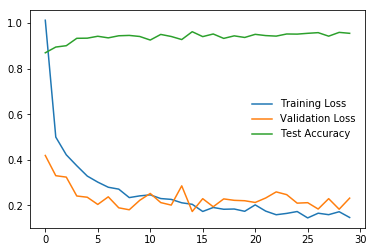

In [124]:
model_0 = TrainModel(trainloader=p0_trainloader, testloader=p0_testloader, lr=0.003, epochs=30, steps=0)

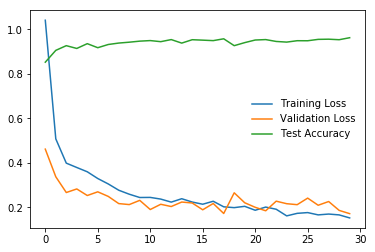

In [125]:
model_1 = TrainModel(trainloader=p1_trainloader, testloader=p1_testloader, lr=0.003, epochs=30, steps=0)

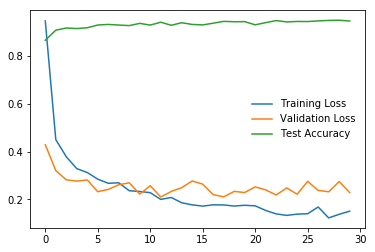

In [126]:
model_2 = TrainModel(trainloader=p2_trainloader, testloader=p2_testloader, lr=0.003, epochs=30, steps=0)

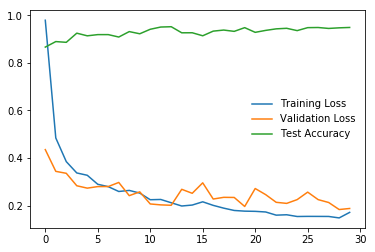

In [127]:
model_3 = TrainModel(trainloader=p3_trainloader, testloader=p3_testloader, lr=0.003, epochs=30, steps=0)

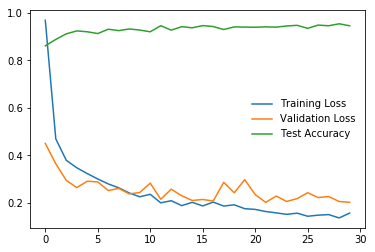

In [128]:
model_4 = TrainModel(trainloader=p4_trainloader, testloader=p4_testloader, lr=0.003, epochs=30, steps=0)

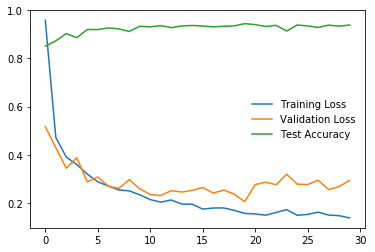

In [129]:
model_5 = TrainModel(trainloader=p5_trainloader, testloader=p5_testloader, lr=0.003, epochs=30, steps=0)

In [0]:
# Return top p, k results from test set for each trained model.
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

def pred(testloader, model):
  # model to evaluation mode
  model.eval()
  
  correct = 0
  total = 0
  
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
  print('Accuracy of the network on the public database: %d %%' % (100 * correct / total))
  
  return predicted

In [131]:
pred_0 = pred(testloader, model_0)
print(pred_0.shape)

Accuracy of the network on the public database: 94 %
torch.Size([10000])


In [132]:
pred_1 = pred(testloader, model_1)
print(pred_1.shape)

Accuracy of the network on the public database: 95 %
torch.Size([10000])


In [133]:
pred_2 = pred(testloader, model_2)
print(pred_2.shape)

Accuracy of the network on the public database: 94 %
torch.Size([10000])


In [134]:
pred_3 = pred(testloader, model_3)
print(pred_3.shape)

Accuracy of the network on the public database: 94 %
torch.Size([10000])


In [135]:
pred_4 = pred(testloader, model_4)
print(pred_4.shape)

Accuracy of the network on the public database: 94 %
torch.Size([10000])


In [136]:
pred_5 = pred(testloader, model_5)
print(pred_5.shape)

Accuracy of the network on the public database: 95 %
torch.Size([10000])


In [185]:
# Aggregate predictons into one array of arrays. convert to a tensor of arrays.
preds_list = []
preds_to_append = [pred_0, pred_1, pred_2, pred_3, pred_4, pred_5]

for i in range(len(preds_to_append)):
  preds_list.append(preds_to_append[i].tolist())

preds_arr = np.array(preds_list)
preds = torch.tensor(preds_arr)
print(preds)


tensor([[7, 2, 1,  ..., 4, 5, 6],
        [7, 2, 1,  ..., 4, 5, 6],
        [7, 2, 1,  ..., 4, 5, 6],
        [7, 2, 1,  ..., 4, 5, 6],
        [7, 2, 1,  ..., 4, 5, 6],
        [7, 2, 1,  ..., 4, 5, 6]])


In [191]:
# All predictions from one teacher
print("All predictions from teacher 0: ", preds[0])

# All predictions for the first image across 
print("All predictions for the first image across: ", preds[:, 0])

All predictions from teacher 0:  tensor([7, 2, 1,  ..., 4, 5, 6])
All predictions for the first image across:  tensor([7, 7, 7, 7, 7, 7])


In [192]:
# Analysis before adding random noise

num_labels = 10 # images of handwritten digits 0 to 9

# pull the predictions for a single image
an_image = preds[:, 0]

# count the nuber of times the models return each integer
label_counts = np.bincount(an_image, minlength=num_labels)
print("counts of labels: ", label_counts)

# return the index of the max value
max_index = np.argmax(label_counts)
print("index of the max value: ", max_index)

counts of labels:  [0 0 0 0 0 0 0 6 0 0]
index of the max value:  7


In [203]:
# Analysis before adding random noise
# Iterate through all the labels

true_labels = list()
pred = np.array(preds).transpose()

for an_image in pred:
  
  label_counts = np.bincount(an_image, minlength = num_labels)
    
  max_index = np.argmax(label_counts)
  
  true_labels.append(max_index)
  
len(true_labels)

true_labels = np.array(true_labels)

print(true_labels)
print(test_targets)

[7 2 1 ... 4 5 6]
tensor([7, 2, 1,  ..., 4, 5, 6])


In [221]:
# Analysis after adding random noise

epsilon = 0.1
sensitivity = 5
beta = 10 / epsilon

for i in range(len(label_counts)):
  label_counts[i] += np.random.laplace(0, beta, 1)
  
print("label counts with laplacian noise: ", label_counts)

# Calculate arg_max on on the labels with the noise added

new_label = np.argmax(label_counts)

print("label with noise added: ", new_label)

label counts with laplacian noise:  [ -22   12 -173  -37  -67 -154  239  123   25  -88]
label with noise added:  6


In [222]:
# Iterate through all the labels

new_labels = list()

for an_image in pred:
  
  label_counts = np.bincount(an_image, minlength = 10)
  
  epsilon = 0.1
  sensitivity = 10
  beta = sensitivity / epsilon
  
  for i in range(len(label_counts)):
    label_counts[i] += np.random.laplace(0, beta, 1)
    
  new_label = np.argmax(label_counts)
  
  new_labels.append(new_label)
  
len(new_labels)

new_labels = np.array(new_labels)

print(new_labels)

[0 1 6 ... 1 4 4]


In [223]:
print(true_labels)
print(new_labels)

[7 2 1 ... 4 5 6]
[0 1 6 ... 1 4 4]


In [224]:
!pip install syft

In [225]:
""""Performs PATE analysis on predictions from teachers and combined predictions for student.

    Args:
        teacher_preds: a numpy array of dim (num_teachers x num_examples). Each value corresponds to the
            index of the label which a teacher gave for a specific example
        indices: a numpy array of dim (num_examples) of aggregated examples which were aggregated using
            the noisy max mechanism.
        noise_eps: the epsilon level used to create the indices
        delta: the desired level of delta
        moments: the number of moments to track (see the paper)
        beta: a smoothing parameter (see the paper)
    Returns:
        tuple: first value is the data dependent epsilon, then the data independent epsilon
    """

'"Performs PATE analysis on predictions from teachers and combined predictions for student.\n\n    Args:\n        teacher_preds: a numpy array of dim (num_teachers x num_examples). Each value corresponds to the\n            index of the label which a teacher gave for a specific example\n        indices: a numpy array of dim (num_examples) of aggregated examples which were aggregated using\n            the noisy max mechanism.\n        noise_eps: the epsilon level used to create the indices\n        delta: the desired level of delta\n        moments: the number of moments to track (see the paper)\n        beta: a smoothing parameter (see the paper)\n    Returns:\n        tuple: first value is the data dependent epsilon, then the data independent epsilon\n    '

In [226]:
num_teachers, num_examples, num_labels = (len(preds), len(preds[0]), 10)
preds_arr = preds.numpy() # fake preds
indices = new_labels.astype(int) # true answers

print("number of teachers: ", num_teachers)
print("number of examples: ", num_examples)
print("number of labels: ", num_labels)
print("shape of preds array: ", preds.shape)
print("shape of indices array: ", indices.shape)
print(indices)

number of teachers:  6
number of examples:  10000
number of labels:  10
shape of preds array:  torch.Size([6, 10000])
shape of indices array:  (10000,)
[0 1 6 ... 1 4 4]


In [228]:
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=pred.transpose(), indices=indices, noise_eps=0.1, delta=1e-5)

print("Data dependent epsilon: ", data_dep_eps) 
print("Data independent epsilon: ", data_ind_eps) 
print(data_dep_eps < data_ind_eps)

Data dependent epsilon:  411.51292546502725
Data independent epsilon:  411.5129254649703
False
